Name: Tushar Muley
Date: 18, October 2020
Assignment: Chapter 7 7-1

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

In [3]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [7]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [19]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [21]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [24]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [26]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

## Exercises

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [29]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

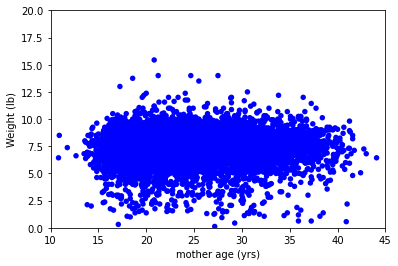

In [33]:
#Scatter plot of birth weight vs. mother's age
thinkplot.Scatter(live.agepreg, live.totalwgt_lb, alpha=1)
thinkplot.Config(xlabel='mother age (yrs)',
                 ylabel='Weight (lb)',
                 axis=[10, 45, 0, 20],
                 legend=False)

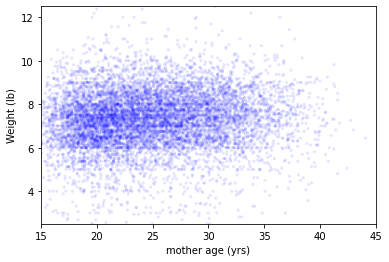

In [38]:
thinkplot.Scatter(live.agepreg, live.totalwgt_lb, alpha=0.1, s=10)
thinkplot.Config(xlabel='mother age (yrs)',
                 ylabel='Weight (lb)',
                 axis=[15, 45, 2.5, 12.5],
                 legend=False)

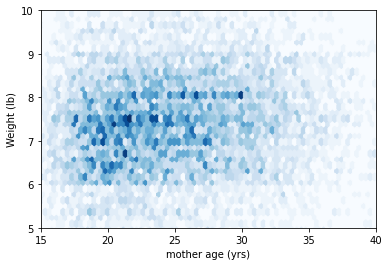

In [37]:
thinkplot.HexBin(live.agepreg, live.totalwgt_lb)
thinkplot.Config(xlabel='mother age (yrs)',
                 ylabel='Weight (lb)',
                 axis=[15, 40, 5, 10],
                 legend=False)

In [45]:
# Plot percentiles of birth weight versus mother’s age

bins = np.arange(15, 40, 5) #start @15yrs stop @ 40yrs count by 5's you get 5 bins
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [46]:
for i, group in groups:
    print(i, len(group))

0 58
1 1852
2 2962
3 2336
4 1393
5 437


In [47]:
mean_agepreg = [groups.agepreg.mean() for i, groups in groups]
cdfs = [thinkstats2.Cdf(groups.totalwgt_lb) for i, groups in groups]

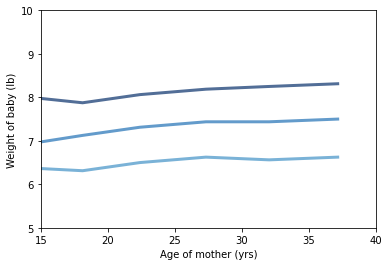

In [51]:
for percent in [75, 50, 25]:
    babyweight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_agepreg, babyweight_percentiles, label=label)
    
thinkplot.Config(xlabel='Age of mother (yrs)',
                 ylabel='Weight of baby (lb)',
                 axis=[15, 40, 5, 10],
                 legend=False)

In [31]:
# Compute Pearson’s and Spearman’s correlations.

In [52]:
Corr(live.agepreg, live.totalwgt_lb)

0.06883397035410904

In [54]:
SpearmanCorr(live.agepreg, live.totalwgt_lb)

0.09461004109658226

In [61]:
#Bring Pearson's correlation closer to Spearman coorelation.
Corr(np.log(live.agepreg), live.totalwgt_lb)

0.07416023655944325

In [58]:
np.corrcoef(live.agepreg, live.totalwgt_lb)

array([[1.        , 0.06883397],
       [0.06883397, 1.        ]])

In [32]:
#How would you characterize the relationship between these variables?
#Well... Pearson coorelation can be brought closer to Spearman's coorelation if I log the age of the women. 
#It appears a women's age and birth weight are strongly coorelated based on Spearman's correlation. And it is a 
#postive correlation.